<h2> b.a.m 예시<h2/>

In [16]:
import numpy as np

X1 = [0, 0, 1]
X2 = [0, 1, 0]
X3 = [1, 0, 0]

Y1 = [0, 1, 1]
Y2 = [1, 0, 1]
Y3 = [1, 1, 0]

W = np.outer(X1, Y1) + np.outer(X2, Y2) + np.outer(X3, Y3)

print(W)

y1_pre = np.dot(X1, W)
y2_pre = np.dot(X2, W)
y3_pre = np.dot(X3, W)

print(y1_pre)
print(y2_pre)
print(y3_pre)

[[1 1 0]
 [1 0 1]
 [0 1 1]]
[0 1 1]
[1 0 1]
[1 1 0]


Learned from 2 image    s


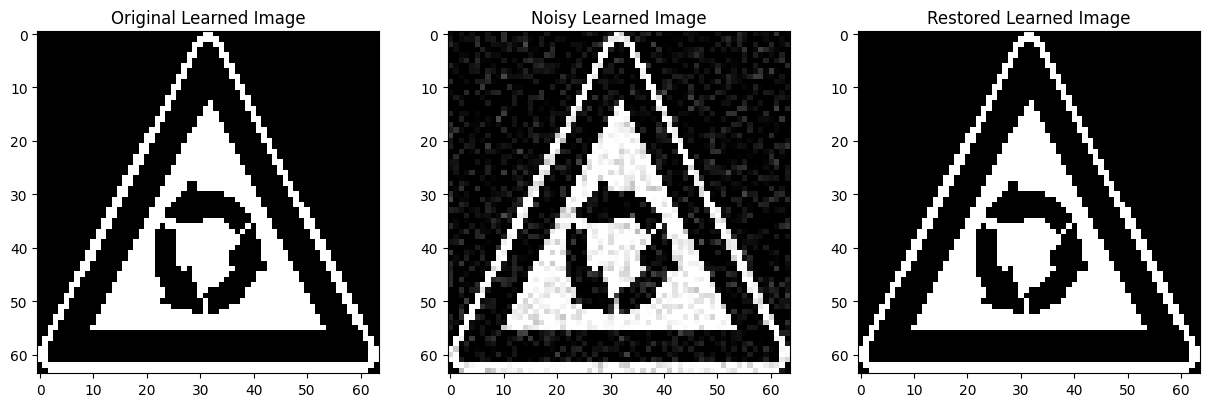

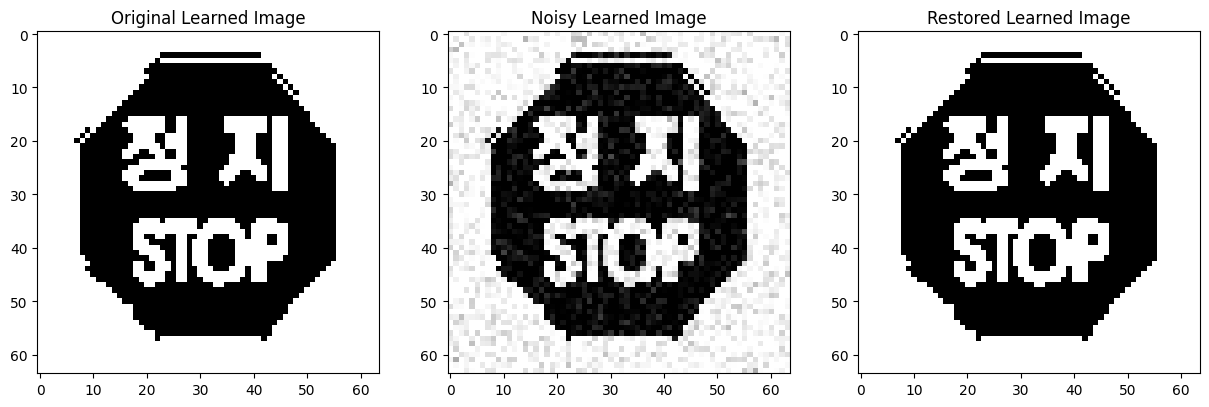

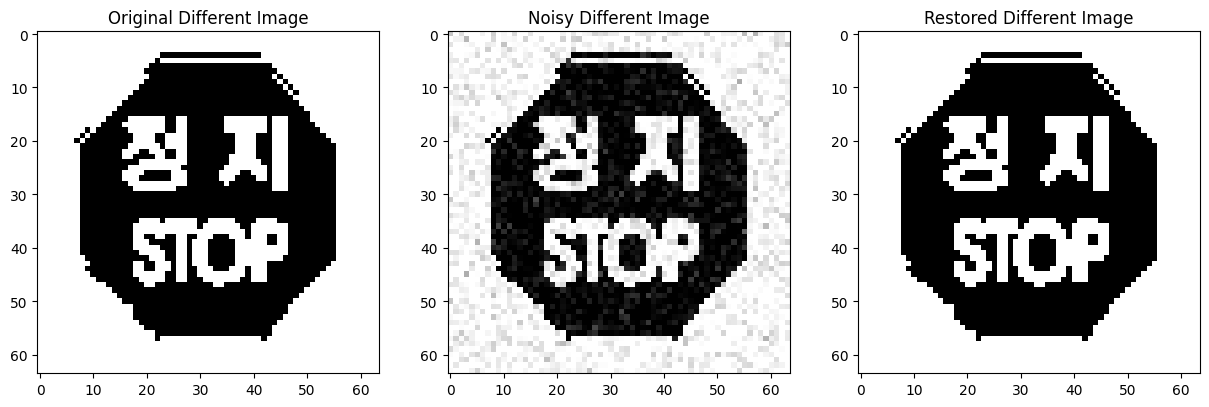

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
import random

def load_and_preprocess_image(image_path, target_size=(64, 64), threshold=0):
    img = Image.open(image_path).convert('L')  # Convert to grayscale                   
    img = img.resize(target_size)
    # Normalize to [-127.5 to 127.5]
    img_array = np.array(img) / 255 * 255 - 127.5
    
    # Binarize the image
    binary_img = (img_array > threshold).astype(int)
    
    # Convert to bipolar (-1 and 1)
    bipolar_img = 2 * binary_img - 1
    
    return bipolar_img.flatten()

class ImproveBAM:
    def __init__(self, input_size, output_size):
        self.W = np.zeros((input_size, output_size))
    
    # Hebbian learning rule w_ij = 1/p sigma x_i * y_j
    def hebbian_learning(self, x, y):
        self.W += np.outer(x, y)
        self.symmetrize_weights()
        
    def symmetrize_weights(self):
        self.W = (self.W + self.W.T) / 2
    
    def energy(self, x, y):
        return -0.5 * (np.dot(np.dot(x, self.W), y) + np.dot(np.dot(y, self.W.T), x))
    
    # activation function 
    #def activation_function(self, x):
    #    return np.clip(x, 0, 255)
    
    def activation_function(self, x):
        return np.where(x >= 0, 1, -1)
    
    # Asynchronous recall
    def async_recall(self, x, iterations=50000):
        y = self.activation_function(np.dot(x, self.W))
        for _ in range(iterations):
            i = np.random.randint(len(x))
            x[i] = self.activation_function(np.dot(self.W[i, :], y))
            j = np.random.randint(len(y))
            y[j] = self.activation_function(np.dot(self.W[:, j], x))
        return x, y
    
def add_noise(image, noise_factor=0.2):
    noisy_image = image + noise_factor * np.random.randn(*image.shape)
    return np.clip(noisy_image, -1, 1)

# Set the path to your image folder
image_folder = "test1"
# Initialize the ImprovedBAM
image_size = 64 * 64  # Assuming 64x64 images
bam = ImproveBAM(image_size, image_size)
    
# Load all image files in the folder
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Set the path to your image folder
image_folder = "test1"
# Initialize the ImprovedBAM
image_size = 64 * 64  # Assuming 64x64 images
bam = ImproveBAM(image_size, image_size)

# Load all image files in the folder
image_files = [f for f in os.listdir(image_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

# Load and preprocess all images
images = []
for image_file in image_files:
    image_path = os.path.join(image_folder, image_file)
    img = load_and_preprocess_image(image_path)
    images.append(img)

# Learn from all images
for img in images:
    bam.hebbian_learning(img, img)

print(f"Learned from {len(images)} image    s")

# Function to test and visualize results
def test_and_visualize(test_image, title):
    noisy_image = add_noise(test_image)
    restored_image, _ = bam.async_recall(noisy_image.copy())

    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.imshow(test_image.reshape((64, 64)), cmap='gray')
    plt.title(f'Original {title}')
    plt.subplot(132)
    plt.imshow(noisy_image.reshape((64, 64)), cmap='gray')
    plt.title(f'Noisy {title}')
    plt.subplot(133)
    plt.imshow(restored_image.reshape((64, 64)), cmap='gray')
    plt.title(f'Restored {title}')
    plt.show()
    
# Test with the learned images
for img in images:
    test_and_visualize(img, "Learned Image")
    
# Test with a different random image
test_image_file = random.choice(image_files)
test_image_path = os.path.join(image_folder, test_image_file)

test_image = load_and_preprocess_image(test_image_path)
test_and_visualize(test_image, "Different Image")


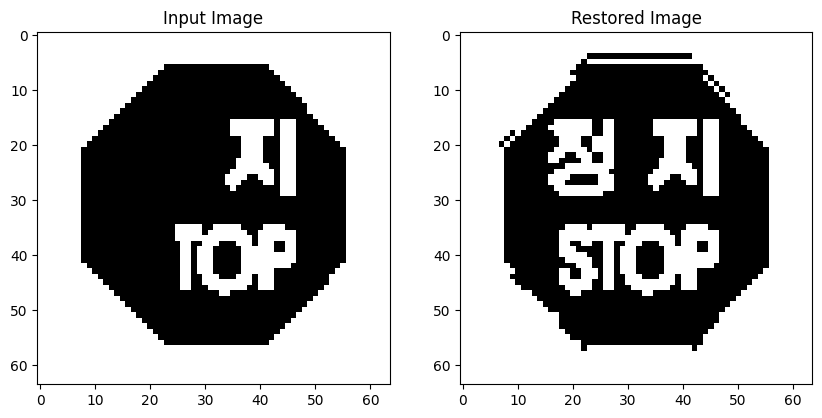

In [10]:
# 원하는 이미지 경로 지정
desired_image_path = "test/손상.png"  # 원하는 이미지 경로로 변경하세요

# 이미지 불러오기 및 전처리
desired_image = load_and_preprocess_image(desired_image_path)

# 연상 과정 수행
restored_image, _ = bam.async_recall(desired_image.copy())

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(desired_image.reshape((64, 64)), cmap='gray')
plt.title('Input Image')
plt.subplot(122)
plt.imshow(restored_image.reshape((64, 64)), cmap='gray')
plt.title('Restored Image')
plt.show()

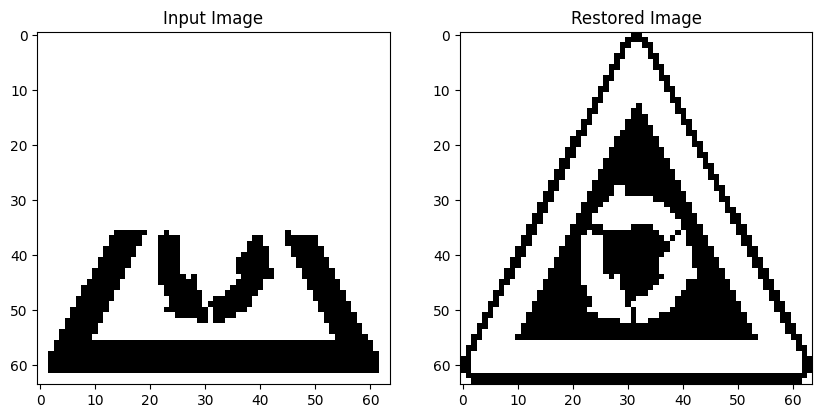

In [11]:
# 원하는 이미지 경로 지정
desired_image_path = "test/손상3.png"  # 원하는 이미지 경로로 변경하세요

# 이미지 불러오기 및 전처리
desired_image = load_and_preprocess_image(desired_image_path)

# 연상 과정 수행
restored_image, _ = bam.async_recall(desired_image.copy())

# 결과 시각화
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(desired_image.reshape((64, 64)), cmap='gray')
plt.title('Input Image')
plt.subplot(122)
plt.imshow(restored_image.reshape((64, 64)), cmap='gray')
plt.title('Restored Image')
plt.show()

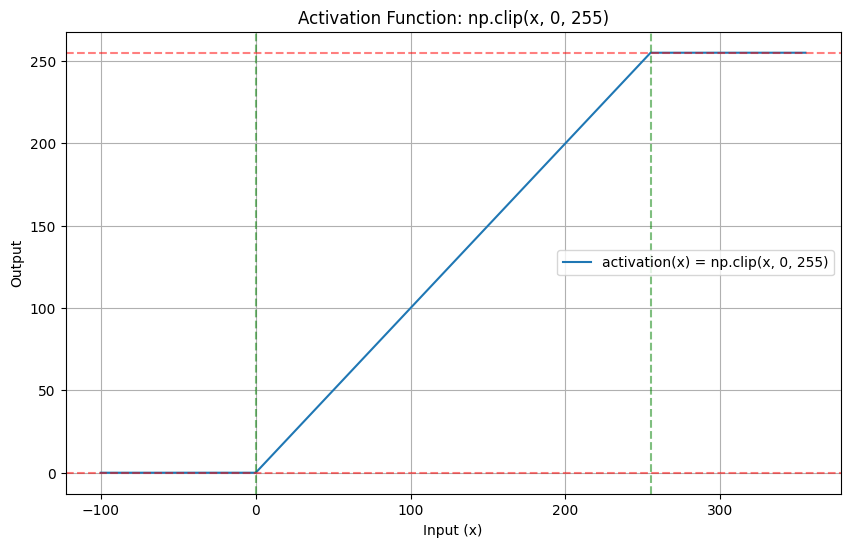

In [12]:
import numpy as np
import matplotlib.pyplot as plt

def activation_function(x):
    return np.clip(x, 0, 255)

# Generate x values
x = np.linspace(-100, 355, 1000)

# Apply activation function
y = activation_function(x)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='activation(x) = np.clip(x, 0, 255)')
plt.xlabel('Input (x)')
plt.ylabel('Output')
plt.title('Activation Function: np.clip(x, 0, 255)')
plt.axhline(y=0, color='r', linestyle='--', alpha=0.5)
plt.axhline(y=255, color='r', linestyle='--', alpha=0.5)
plt.axvline(x=0, color='g', linestyle='--', alpha=0.5)
plt.axvline(x=255, color='g', linestyle='--', alpha=0.5)
plt.legend()
plt.grid(True)
plt.show()